In [2]:
!pip install WordCloud

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Load the dataset
file_path = 'shopping_trends_updated.csv'  # Update this path if the file location is different
shopping_data = pd.read_csv(file_path)


In [7]:
# Display basic info about the dataset
print("Dataset Info:")
print(shopping_data.info())
print("\nFirst 5 Rows:")
print(shopping_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         39

**1 What is the overall distribution of customer ages in the dataset?**

In [12]:
print("\n1. Age Distribution:")
print(shopping_data['Age'].value_counts())


1. Age Distribution:
Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64


In [15]:
shopping_data['Age_category'] = pd.cut(shopping_data['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

**2 How does the average purchase amount vary across different product categories?**

In [9]:
# 2. Average Purchase Amount by Product Category
print("\n2. Average Purchase Amount by Category:")
print(shopping_data.groupby('Category')['Purchase Amount (USD)'].mean())


2. Average Purchase Amount by Category:
Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


**3 Which gender has the highest number of purchases?**

In [10]:
# 3. Gender with the Highest Purchases
print("\n3. Gender Purchases:")
print(shopping_data['Gender'].value_counts())


3. Gender Purchases:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


**4 What are the most commonly purchased items in each category?**

In [21]:
# 4. Most Commonly Purchased Items in Each Category
print("\n4. Most Commonly Purchased Items by Category:")
print(shopping_data.groupby('Category')['Item Purchased'].agg(lambda x: x.mode().iloc[0]))


4. Most Commonly Purchased Items by Category:
Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


In [22]:
shopping_data.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

**5. Are there any specific seasons or months where customer spending is significantly higher?**

In [25]:
shopping_data.groupby('Season')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Season,
Fall,61.556923
Spring,58.737738
Summer,58.405236
Winter,60.357364


**6 What is the average rating given by customers for each product category?**

In [28]:
shopping_data.groupby('Category')['Review Rating'].mean()

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


**7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**

In [29]:
shopping_data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


In [30]:
shopping_data['Purchase Amount (USD)'].sum()

233081


**8 Which payment method is the most popular among customers?**

In [32]:
shopping_data.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


In [31]:
shopping_data['Payment Method'].mode()[0]

'PayPal'

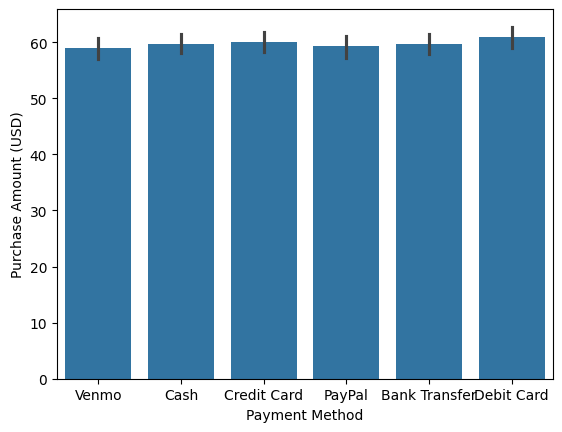

In [33]:
sns.barplot(shopping_data ,x='Payment Method' , y = 'Purchase Amount (USD)')
plt.show()

**9 Do customers who use promo codes tend to spend more than those who don't?**

In [35]:
shopping_data_groupby  = shopping_data.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [36]:
shopping_data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Promo Code Used,
No,60.130454
Yes,59.279070



**10 How does the frequency of purchases vary across different age groups?**


In [37]:
shopping_data[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [38]:
shopping_data['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [40]:
age_groups = pd.cut(shopping_data['Age'], bins=[0, 18, 25, 40, 60, 100], labels=['<18', '18-25', '26-40', '41-60', '>60'])
shopping_data.groupby(age_groups)['Frequency of Purchases'].value_counts()

<ipython-input-40-02faecb19f47>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_data.groupby(age_groups)['Frequency of Purchases'].value_counts()


Age    Frequency of Purchases
<18    Every 3 Months             12
       Quarterly                  11
       Annually                   10
       Bi-Weekly                  10
       Fortnightly                10
       Weekly                      9
       Monthly                     7
18-25  Annually                   84
       Every 3 Months             81
       Fortnightly                72
       Bi-Weekly                  71
       Quarterly                  68
       Monthly                    64
       Weekly                     62
26-40  Every 3 Months            173
       Monthly                   160
       Bi-Weekly                 159
       Fortnightly               158
       Quarterly                 154
       Weekly                    151
       Annually                  148
41-60  Monthly                   224
       Every 3 Months            219
       Bi-Weekly                 217
       Annually                  212
       Quarterly                 212
       Weekly                    212
       Fortnightly               207
>60    Annually                  118
       Quarterly                 118
       Weekly                    105
       Every 3 Months             99
       Monthly                    98
       Fortnightly                95
       Bi-Weekly                  90
Name: count, dtype: int64

**11 Are there any correlations between the size of the product and the purchase amount?**

In [41]:
shopping_data.groupby('Size')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Size,
L,58.563153
M,59.924217
S,61.037707
XL,60.090909


**12 Which shipping type is preferred by customers for different product categories?**

In [42]:
shopping_data.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [43]:
shopping_data['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

**13 How does the presence of a discount affect the purchase decision of customers?**

In [44]:
shopping_data.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Discount Applied,
No,60.130454
Yes,59.279070


**14 Are there any specific colors that are more popular among customers?**

In [45]:
shopping_data['Color'].value_counts().head()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


**15 What is the average number of previous purchases made by customers?**

In [46]:
shopping_data['Previous Purchases'].mean()

25.35153846153846

**16 Are there any noticeable differences in purchase behavior between different locations?**

In [49]:
shopping_data.groupby('Location')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Location,
Alabama,59.112360
Alaska,67.597222
Arizona,66.553846
Arkansas,61.113924
California,59.000000
Colorado,56.293333
Connecticut,54.179487
Delaware,55.325581
Florida,55.852941


**17 Is there a relationship between customer age and the category of products they purchase?**

In [50]:
shopping_data.groupby('Location')['Purchase Amount (USD)'].mean().head()

,Purchase Amount (USD)
Location,
Alabama,59.112360
Alaska,67.597222
Arizona,66.553846
Arkansas,61.113924
California,59.000000


**18 How does the average purchase amount differ between male and female customers?**

In [51]:
shopping_data.groupby(age_groups)['Category'].value_counts()

<ipython-input-51-54f48c8fa1b2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_data.groupby(age_groups)['Category'].value_counts()


Age    Category   
<18    Clothing        33
       Accessories     18
       Outerwear       10
       Footwear         8
18-25  Clothing       236
       Accessories    154
       Footwear        71
       Outerwear       41
26-40  Clothing       486
       Accessories    370
       Footwear       163
       Outerwear       84
41-60  Clothing       662
       Accessories    455
       Footwear       259
       Outerwear      127
>60    Clothing       320
       Accessories    243
       Footwear        98
       Outerwear       62
Name: count, dtype: int64

**19. How does the average purchase amount differ between male and female customers?**

In [52]:
shopping_data.groupby('Gender')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Gender,
Female,60.249199
Male,59.536199
